In [30]:
from methods.LEGv0 import *

## Available Models:
    VGG19
    VGG16
    ResNet
    Inception
    Xception

In [31]:
model=VGG16()

In [60]:
from keras.preprocessing import image
import numpy as np

### Sample of Starfish

We are excuting LEG program __main__
Image has been read successfully
VGG19 has been imported successfully
('n02317335', 'starfish', 0.9879534)
('n01943899', 'conch', 0.009878846)
('n01704323', 'triceratops', 0.00093728857)
('n02321529', 'sea_cucumber', 0.0005676903)
('n01950731', 'sea_slug', 0.00030538792)
The Classfication Category is  327
matrix_d creation completed
Sigma creation complted
327 0.9879534


C:\Users\RmmLeo10\anaconda3\envs\tensorflow\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 97 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\RmmLeo10\anaconda3\envs\tensorflow\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 98 times so far.

  warnings.war

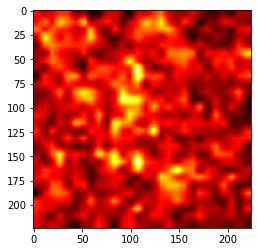

The time spent on LEG explanation is  5.31 mins


In [90]:
if __name__ == "__main__":
    print("We are excuting LEG program", __name__)
    # read the image
    img = image.load_img('Image/starfish.png', target_size=(224,224))
    img = image.img_to_array(img).astype(int)
    image_input = np.expand_dims(img.copy(), axis = 0)
    image_input = preprocess_input(image_input)
    print("Image has been read successfully")

    # read the model
    VGG19_MODEL = VGG19(weights='imagenet',include_top = True)
    print("VGG19 has been imported successfully")
    # make the prediction of the image by the vgg19
    preds = VGG19_MODEL.predict(image_input)
    for pred_class in decode_predictions(preds)[0]:
        print(pred_class)
    chosen_class = np.argmax(preds)
    print("The Classfication Category is ", chosen_class)
    begin_time = time()

    LEG = LEG_explainer(np.expand_dims(img.copy(), axis = 0), VGG19_MODEL, predict_vgg16, num_sample = 500, penalty=None)
    LEGTV = LEG_explainer(np.expand_dims(img.copy(), axis = 0), VGG19_MODEL, predict_vgg19, num_sample = 500, penalty='TV', lambda_arr = [0.1, 0.3])
    end_time = time()
    plt.imshow(LEG[0][0], cmap='hot', interpolation="nearest")
    plt.show() #change the backend of matplotlib if it can not be displayed 
    plt.imshow(LEGTV[0][0], cmap='hot', interpolation="nearest")
    plt.show()
    
    print("The time spent on LEG explanation is ",round((end_time - begin_time)/60,2), "mins") 

### Sample of Seagull, overlap with original image

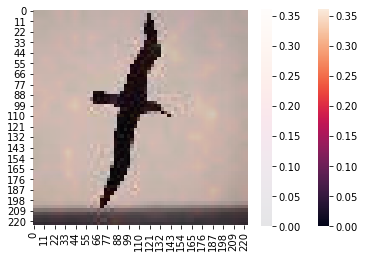

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg # add

df = pd.DataFrame(boolen*LEGTV[0][0])

#make the df heatmap friendly
df_cnt = df

#missing values 
df_cnt.fillna(0, inplace=True)

#load an image
my_image = Image.open('Image/dog.jpg')

#plot a an image
plt.imshow(my_image, zorder = 0)
#Note: I can see the image correctly in my IDE

#plot a heatmap
h = sns.heatmap(df_cnt)

#Heatmap is displayed but it is not over the backroung image....
h = sns.heatmap(df_cnt, alpha=0.1, zorder=2) # update
my_image = mpimg.imread('Image/dog.jpg') # update
# update
h.imshow(my_image,
         aspect=h.get_aspect(),
         extent= h.get_xlim() + h.get_ylim(),
         zorder=1)

plt.show() # add